In [3]:
# load graph representation of network
# station -> nodes
# stretches -> edges

import networkx as nx
import pandas as pd

STRETCHES_PATH = '../static/stretches.csv'
STATIONS_PATH = '../static/stations.csv'

stretches = pd.read_csv(STRETCHES_PATH, dtype=str).dropna(how='all')
stations = pd.read_csv(STATIONS_PATH, dtype=str).dropna(how='all')

G = nx.Graph()

# add nodes
station_list = list(stations.itertuples(index=False, name=None)) # [(station_name, station_uic)]
nodes = [(station[1], {'station_name': station[0]}) for station in station_list]
G.add_nodes_from(nodes)

# add edges
# attraction force is used to draw the graph by defining the attraction force between the two nodes and is the inverted travel time
edge_list = list(stretches[['station_uic_from', 'station_uic_to', 'station_name_from','station_name_to','travel_cost','super_name']].itertuples(index=False, name=None)) # [(station_name_from, station_uic_from, station_name_to, station_uic_from, travel_cost, super_name)]
edges = [(edge[0], edge[1], {'station_name_from': edge[2], 'station_name_to': edge[3], 'travel_cost': int(edge[4]), 'super_name': edge[5], 'attraction_force': (1 / int(edge[4])) if int(edge[4]) > 0 else 0}) for edge in edge_list]
G.add_edges_from(edges)


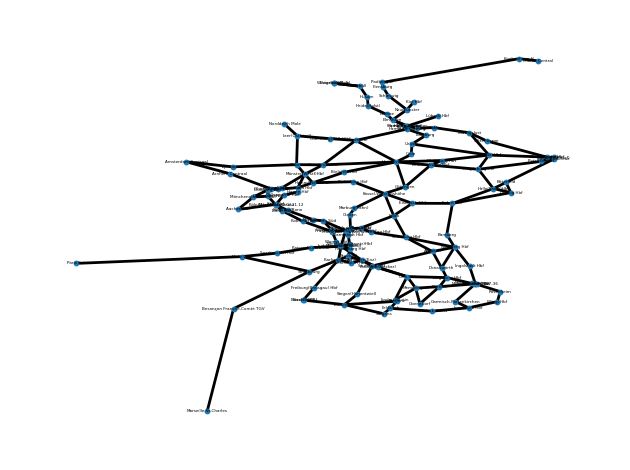

In [4]:


if True:
    import matplotlib.pyplot as plt

    nodes = list(G.nodes())
    
    
    eva_coordinates = {
    "8007769": (54.90667, 8.31167),    # Dagebüll Mole
    "8006369": (54.90853, 8.30982),    # Westerland (Sylt)
    "8004343": (54.81917, 8.89417),    # Niebüll
    "8000181": (54.46889, 9.06778),    # Husum
    "8000155": (54.19722, 9.08806),    # Heide (Holst)
    "8003102": (53.92361, 9.51722),    # Itzehoe
    "8000092": (53.75194, 9.65250),    # Elmshorn
    "8002553": (53.54889, 9.93306),    # Hamburg-Altona
    "8002548": (53.55944, 9.98833),    # Hamburg Dammtor
    "8002549": (53.55222, 9.99278),    # Hamburg Hbf
    "8000147": (53.45083, 9.98167),    # Hamburg-Harburg
    "8000238": (53.24694, 10.41417),   # Lüneburg
    "8000168": (52.96611, 10.09778),   # Uelzen
    "8000064": (52.62222, 10.08056),   # Celle
    "8000152": (52.37583, 9.73778),    # Hannover Hbf
    "8000128": (51.53500, 9.93500),    # Göttingen
    "8003200": (51.31250, 9.46667),    # Kassel-Wilhelmshöhe
    "8000115": (50.55306, 9.67556),    # Fulda
    "8000150": (50.12444, 8.91444),    # Hanau Hbf
    "8002041": (50.10444, 8.69500),    # Frankfurt(Main) Süd
    "8000105": (50.11056, 8.68222),    # Frankfurt(Main) Hbf
    "8070003": (50.03806, 8.57028),    # Frankfurt(M) Flughafen Fernbf
    "8000244": (49.48778, 8.46611),    # Mannheim Hbf
    "8006053": (48.99111, 8.94306),    # Vaihingen (Enz)
    "8000096": (48.78284, 9.17702),    # Stuttgart Hbf
    "8001920": (48.73944, 9.31028),    # Esslingen (Neckar)
    "8000170": (48.40139, 9.98722),    # Ulm Hbf
    "8000013": (48.36667, 10.89833),   # Augsburg Hbf
    "8004158": (48.15639, 11.47111),   # München-Pasing
    "8000262": (48.11778, 11.58750),   # München Ost
    "8000261": (48.14030, 11.55800),   # München Hbf
    "8000183": (48.76583, 11.42583),   # Ingolstadt Hbf
    "8000284": (49.45278, 11.07778),   # Nürnberg Hbf
    "8089478": (49.89861, 10.89944),   # Bamberg
    "8010101": (50.97702, 11.03105),   # Erfurt Hbf
    "8070814": (51.48139, 11.97278),   # Halle (Saale) Hbf
    "8010050": (51.68806, 12.26389),   # Bitterfeld
    "8011113": (52.46861, 13.36056),   # Berlin Südkreuz
    "8098160": (52.52083, 13.36944),   # Berlin Hbf (tief)  (tief / unterirdisch)
    "8011160": (52.52508, 13.36940),   # Berlin Hbf
    "8010404": (52.53611, 13.19972),   # Berlin-Spandau
    "8010334": (52.60167, 11.86917),   # Stendal Hbf
    "8006552": (52.42250, 10.78750),   # Wolfsburg Hbf
    "8000036": (52.03083, 8.53250),    # Bielefeld Hbf
    "8000149": (51.67806, 7.81528),    # Hamm (Westf) Hbf
    "8000080": (51.51444, 7.46806),    # Dortmund Hbf
    "8000098": (51.45444, 7.01278),    # Essen Hbf
    "8000086": (51.43417, 6.77528),    # Duisburg Hbf
    "8000085": (51.22194, 6.77611),    # Düsseldorf Hbf
    "8003368": (50.93611, 6.96083),    # Köln Messe/Deutz
    "8073368": (50.93611, 6.96083),    # Köln Messe/Deutz Gl.11-12 (gleiche Position)
    "8000207": (50.94222, 6.95806),    # Köln Hbf
    "8005556": (50.73361, 7.23472),    # Siegburg/Bonn
    "8000667": (50.41194, 7.82778),    # Montabaur
    "8003680": (50.37750, 8.05000),    # Limburg Süd
    "8000050": (53.08333, 8.80000),    # Bremen Hbf
    "8000294": (52.27861, 8.04667),    # Osnabrück Hbf
    "8000263": (51.96278, 7.62778),    # Münster (Westf) Hbf
    "8000142": (51.36444, 7.47333),    # Hagen Hbf
    "8000266": (51.26500, 7.15028),    # Wuppertal Hbf
    "8002554": (53.48306, 10.21750),   # Hamburg-Bergedorf
    "8000058": (53.50056, 10.60444),   # Büchen
    "8010216": (53.33417, 11.42000),   # Ludwigslust
    "8010382": (53.06333, 11.82472),   # Wittenberge
    "8000010": (49.97972, 9.15167),    # Aschaffenburg Hbf
    "8000260": (49.79639, 9.95389),    # Würzburg Hbf
    "8000191": (49.00694, 8.40389),    # Karlsruhe Hbf
    "8000055": (49.12611, 8.62639),    # Bruchsal
    "8010097": (50.98000, 10.10472),   # Eisenach Hbf
    "8000049": (52.26889, 10.52611),   # Braunschweig Hbf
    "8010205": (51.34583, 12.37500),   # Leipzig Hbf
    "8000107": (47.99770, 7.84117),    # Freiburg (Breisgau) Hbf
    "8000026": (47.56722, 7.60750),    # Basel Bad Bf
    "8500010": (47.54733, 7.58967),    # Basel SBB
    "8503000": (47.37778, 8.54028),    # Zürich HB
    "8000271": (54.07444, 9.98056),    # Neumünster
    "8000199": (54.32333, 10.14222),   # Kiel Hbf
    "8005362": (54.51944, 9.55611),    # Schleswig
    "8000103": (54.78139, 9.43361),    # Flensburg
    "8650100": (54.93500, 9.40611),    # Padborg st (DK, approximate)
    "8601309": (55.67250, 12.56528),   # København H (Copenhagen)
    "7400004": (55.60583, 13.00000),   # Malmö Central (approx)
    "8000237": (53.86639, 10.68778),   # Lübeck Hbf
    "8000156": (49.403611, 8.675278),    # Heidelberg Hbf :contentReference[oaicite:0]{index=0}
    "8000377": (49.553333, 8.665278),    # Weinheim (Bergstr) Hbf :contentReference[oaicite:1]{index=1}
    "8000068": (49.8725, 8.628889),      # Darmstadt Hbf :contentReference[oaicite:2]{index=2}
    "8000124": (50.583333, 8.666667),    # Gießen (Hessen) approx. :contentReference[oaicite:3]{index=3}
    "8000337": (50.807778, 8.770278),     # Marburg (Lahn) :contentReference[oaicite:4]{index=4}
    "8000044": (50.7325, 7.096111),     # Bonn Hbf
    "8000206": (50.356667, 7.589167),   # Koblenz Hbf
    "8000240": (50.001389, 8.258056),   # Mainz Hbf
    "8000250": (50.066389, 8.243889),   # Wiesbaden Hbf
    "8000257": (49.635278, 8.359167),   # Worms Hbf
    "8000236": (49.481111, 8.435556),   # Ludwigshafen (Rh) Hbf
    "8000189": (49.440278, 7.777222),   # Kaiserslautern Hbf
    "8000323": (49.241667, 6.991111),   # Saarbrücken Hbf
    "8700019": (49.119167, 6.175833),   # Metz Ville
    "8700023": (48.584444, 7.734444),   # Strasbourg
    "8700011": (48.876389, 2.359444),    # Paris Est
    "8000297": (51.713611, 8.740833),   # Paderborn Hbf
    "8089178": (52.130278, 11.626389),  # Magdeburg Hbf
    "8000299": (48.8925, 8.698333),     # Pforzheim Hbf
    "8000009": (49.300278, 10.571389),  # Ansbach
    "8000078": (48.718056, 10.779167),   # Donauwörth
        "8000118": (51.505278, 7.100278),    # Gelsenkirchen Hbf
    "8000286": (51.472222, 6.855278),    # Oberhausen Hbf
    "8400071": (51.983333, 5.901944),    # Arnhem Centraal
    "8000253": (51.196944, 6.446389),    # Mönchengladbach Hbf
    "8000001": (50.767778, 6.091111),    # Aachen Hbf
    "8000316": (52.285278, 7.440556),    # Rheine
    "8400058": (52.378889, 4.900278),    # Amsterdam Centraal
    "8000291": (53.141944, 8.214167),    # Oldenburg (Oldb) Hbf
    "8000225": (53.231667, 7.461111),    # Leer (Ostfriesl)
    "8007768": (53.616389, 7.159444),    # Norddeich Mole
    "8730086": (47.230833, 5.988333),     # Besançon Franche-Comté TGV
  "8400066": (52.211667, 5.970833),   # Apeldoorn
    "8700464": (43.303056, 5.380556),
        "8012666": (52.391111, 13.066667),   # Potsdam Hbf
            "8000073": (47.759167, 8.835833),    # Singen (Hohentwiel)
    "8100090": (47.503056, 9.747222),    # Bregenz
    "8003693": (47.558889, 9.706944),    # Lindau-Reutin
    "8000249": (47.983333, 10.183333),   # Memmingen
    "8000057": (48.0375, 10.730833),     # Buchloe
    "8098261": (48.141389, 11.553056),   # München Hbf Gl.27-36
    "8004585": (47.410278, 10.279722),   # Oberstdorf
    "8002187": (47.492778, 11.096944),   # Garmisch-Partenkirchen
    "8100108": (47.263056, 11.400556),   # Innsbruck Hbf
    "8100099": (47.489722, 12.064722),   # Wörgl Hbf
    "8000320": (47.856389, 12.128333),   # Rosenheim
    "8100197": (47.241667, 9.599167),     # Feldkirch 
    "8100063": (47.139167, 10.5675),   # Landeck-Zams
        "8509411": (47.045278, 9.443611)   # Sargans
}



    import math
    from pyproj import Transformer

    # Transformer: WGS84 (lat/lon) -> Web Mercator (x,y in Metern)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

    pos = {}
    for eva, (lat, lon) in eva_coordinates.items():
        x, y = transformer.transform(lon, lat)
        pos[eva] = (x, y)

    #pos = nx.kamada_kawai_layout(G, weight='travel_cost')
    #pos = nx.kamada_kawai_layout(G, weight='travel_cost', pos=pos)
    # nodes
    
    
    nx.draw_networkx_nodes(G, pos, node_size=10)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

    # node labels
    labels = {n: d["station_name"] for n, d in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, font_size=3, font_family="sans-serif", labels=labels)
    # edge weight labels
    #edge_labels = nx.get_edge_attributes(G, "travel_cost")
    #nx.draw_networkx_edge_labels(G, pos,font_size=5, edge_labels=edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    
    plt.savefig("graph.png", format="png", dpi=900, bbox_inches='tight')
    
    plt.show()
